### Dataset: Airlines Delay. 

#### Objetivos: 
<p> 
    <li> Realizar un análisis EDA sobre los datos. </li>
    <li> Predecir si los vuelos van a salir a hora, o bien, si van a demorarse.</li> 
</p>

#### Link del Dataset: 

https://www.kaggle.com/datasets/ulrikthygepedersen/airlines-delay 

In [1]:
# Importamos algunas librerías que vamos a utilizar: 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

### Data Acquisition: 

In [2]:
# Importamos los datos: 
df = pd.read_csv(r'\Users\Usuario\Desktop\Luciana\Datos\Proyectos\Airline Delays\airlines_delay.csv') 
df.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0


In [3]:
# Vemos un poco las columnas: 
df.columns

Index(['Flight', 'Time', 'Length', 'Airline', 'AirportFrom', 'AirportTo',
       'DayOfWeek', 'Class'],
      dtype='object')

##### Columnas: 
<p> 
    <li> Flight: Número de vuelo. </li>
    <li> Time: Hora de salida (en minutos). </li>
    <li> Length: Duración del vuelo (en minutos). </li>
    <li> Airline: ID de la aerolina. </li>
    <li> AirportFrom: Aeropuerto de salida. </li>
    <li> AirportTo: Aeropuerto de llegada. </li>
    <li> DarOfWeek: Día de la semana del vuelo. </li>
    <li> Class: Si el vuelo está retrasado o no (0 on time, 1 delayed). </li>
</p>

In [4]:
# Estructura del dataframe: 
df.shape

(539382, 8)

<p> Hay 539.382 datos sobre los cuales vamos a hacer el análisis y la predicción. </p>

In [5]:
# Veamos un poco más en detalle cada columna: 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539382 entries, 0 to 539381
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Flight       539382 non-null  float64
 1   Time         539382 non-null  float64
 2   Length       539382 non-null  float64
 3   Airline      539382 non-null  object 
 4   AirportFrom  539382 non-null  object 
 5   AirportTo    539382 non-null  object 
 6   DayOfWeek    539382 non-null  int64  
 7   Class        539382 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 32.9+ MB


<p> Podemos observar que no hay datos nulos en ninguna columna. Por otro lado, a los datos los podemos agrupar de la siguiente forma: 
    <li> Numéricos: 'Time', 'Length'. </li>
    <li> Categóricos: 'Airline', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Class'. </li>
</p>

### Data Wrangling: 

In [6]:
# Vamos a transformar el tipo de dato de la columna 'Flight' a Int, y la columna 'Time' a horas y minutos: 
df['Flight'] = df['Flight'].astype(int)
df['Flight'].dtype

dtype('int32')

In [7]:
def horas_minutos(min): 
    horas = min//60
    minutos = min % 60
    return '%02d:%02d' % (horas, minutos)


df['Time (Hours)'] = df['Time'].apply(horas_minutos)

In [8]:
# Transformamos el ID del vuelo en nuestro índice: 
df.set_index('Flight', inplace = True)

In [9]:
df['Time']

Flight
2313    1296.0
6948     360.0
1247    1170.0
31      1410.0
563      692.0
         ...  
6973     530.0
1264     560.0
5209     827.0
607      715.0
6377     770.0
Name: Time, Length: 539382, dtype: float64

In [10]:
# Vamos a determinar la cantidad de aerolineas y aeropuertos que tenemos para definir que type mejor se ajusta a dichas columnas: 
print('Hay', len(pd.unique(df['Airline'])), 'aerolinas diferentes.')
print('Hay', len(pd.unique(df['AirportFrom'])), 'aeropuertos de salida.')
print('Hay', len(pd.unique(df['AirportTo'])), 'aeropuertos de llegada.')

Hay 18 aerolinas diferentes.
Hay 293 aeropuertos de salida.
Hay 293 aeropuertos de llegada.


In [11]:
# Vamos a transformar las columnas de categoría en category en lugar de object: 
df['Airline'] = df['Airline'].astype('category')
df['AirportFrom'] = df['AirportFrom'].astype('category')
df['AirportTo'] = df['AirportTo'].astype('category')
df['DayOfWeek'] = df['DayOfWeek'].astype('category')

In [12]:
# Chequeamos: 
df.dtypes

Time             float64
Length           float64
Airline         category
AirportFrom     category
AirportTo       category
DayOfWeek       category
Class              int64
Time (Hours)      object
dtype: object

<p> Vamos a ver rápidamente un poco la información que contiene las columnas categóricas y numéricas: </p>

In [13]:
df['Airline'].value_counts()

WN    94097
DL    60940
OO    50254
AA    45656
MQ    36604
US    34500
XE    31126
EV    27983
UA    27619
CO    21118
FL    20827
9E    20686
B6    18112
YV    13725
OH    12630
AS    11471
F9     6456
HA     5578
Name: Airline, dtype: int64

In [14]:
df['AirportFrom'].value_counts()

ATL    34449
ORD    24822
DFW    22153
DEN    19843
LAX    16657
       ...  
MMH       16
SJT       15
GUM       10
ADK        9
ABR        2
Name: AirportFrom, Length: 293, dtype: int64

In [15]:
df['AirportTo'].value_counts()

ATL    34440
ORD    24871
DFW    22153
DEN    19848
LAX    16656
       ...  
MMH       16
SJT       15
GUM       10
ADK        9
ABR        2
Name: AirportTo, Length: 293, dtype: int64

In [16]:
df['DayOfWeek'].value_counts()

4    91445
3    89746
5    85247
1    72769
2    71340
7    69879
6    58956
Name: DayOfWeek, dtype: int64

In [17]:
df['Class'].value_counts()

0    299118
1    240264
Name: Class, dtype: int64

In [18]:
df['Length'].describe()

count    539382.000000
mean        132.202104
std          70.117045
min           0.000000
25%          81.000000
50%         115.000000
75%         162.000000
max         655.000000
Name: Length, dtype: float64

### EDA:  

##### ¿Qué aerolinas tienen mayor frecuencia de vuelos, y cuál de ella tiene mayor cantidad de vuelos retrasados?

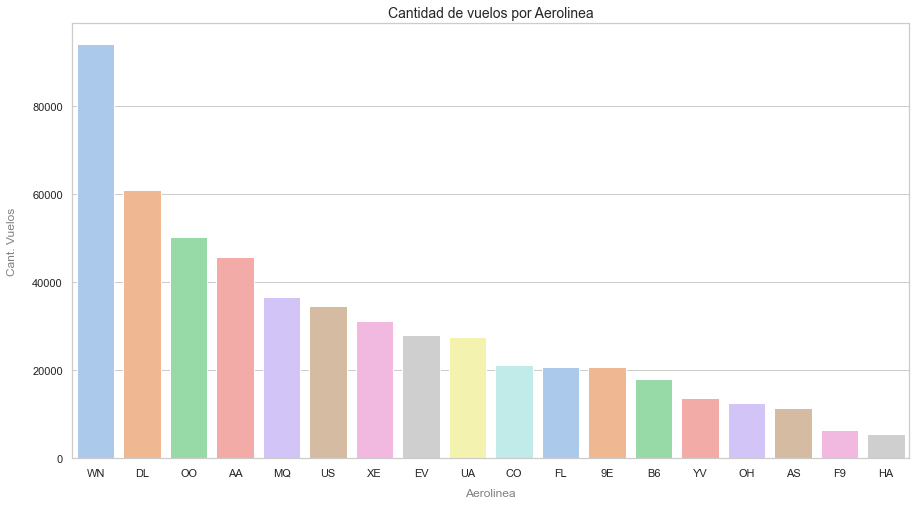

In [19]:
# Aerolinea: 
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize =(15, 8))
colores = sns.color_palette("pastel")
ax = sns.countplot(df.Airline, palette = colores, order = df.Airline.value_counts().index)
ax.set_title('Cantidad de vuelos por Aerolinea',fontdict = {'fontsize': 14})
plt.ylabel('Cant. Vuelos', fontdict = {'fontsize': 12, 'color': 'grey'}, labelpad = 15)
plt.xlabel('Aerolinea', fontdict = {'fontsize': 12, 'color': 'grey'}, labelpad = 10)
plt.show()

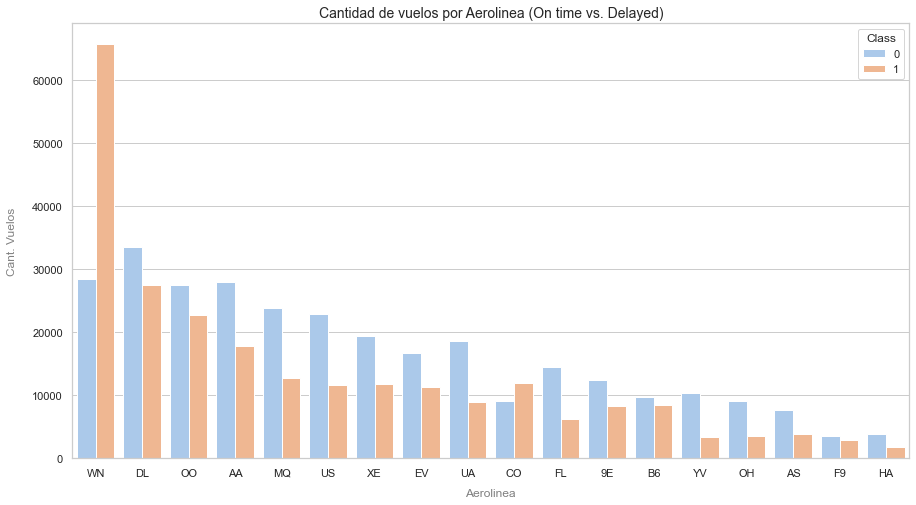

In [20]:
# Aerolinea: 
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize =(15, 8))
colores = sns.color_palette("pastel")
ax = sns.countplot(df.Airline, palette = colores, hue = df.Class, order = df.Airline.value_counts().index)
ax.set_title('Cantidad de vuelos por Aerolinea (On time vs. Delayed)',fontdict = {'fontsize': 14})
plt.ylabel('Cant. Vuelos', fontdict = {'fontsize': 12, 'color': 'grey'}, labelpad = 15)
plt.xlabel('Aerolinea', fontdict = {'fontsize': 12, 'color': 'grey'}, labelpad = 10)
plt.show()

<p> Podemos observar que la aeorlinea que tiene más vuelos acumulados (WN) es también la que tiene mayor cantidad de vuelos retrasados. Asimismo, podemos observar que, en el caso de la aerolinea CO, la misma tiene más vuelos retrasados que a tiempo. 
<br> 
Sin embargo, no podemos identificar exactamente qué aerolineas son aquellas que tienen mayor cantidad de vuelos demorados.</p> 

In [21]:
df_copia = df[df['Class'] == 1].copy()
df_copia

,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class,Time (Hours)
Flight,,,,,,,,
104,765.0,250.0,WN,SEA,MDW,7,1,12:45
120,549.0,308.0,UA,SFO,IAD,5,1,09:09
18,845.0,111.0,DL,DTW,LGA,6,1,14:05
2339,915.0,83.0,XE,CLE,GRB,5,1,15:15
521,780.0,60.0,WN,STL,MDW,1,1,13:00
...,...,...,...,...,...,...,...,...
6973,530.0,72.0,OO,GEG,SEA,5,1,08:50
1264,560.0,115.0,WN,LAS,DEN,4,1,09:20
5209,827.0,74.0,EV,CAE,ATL,2,1,13:47


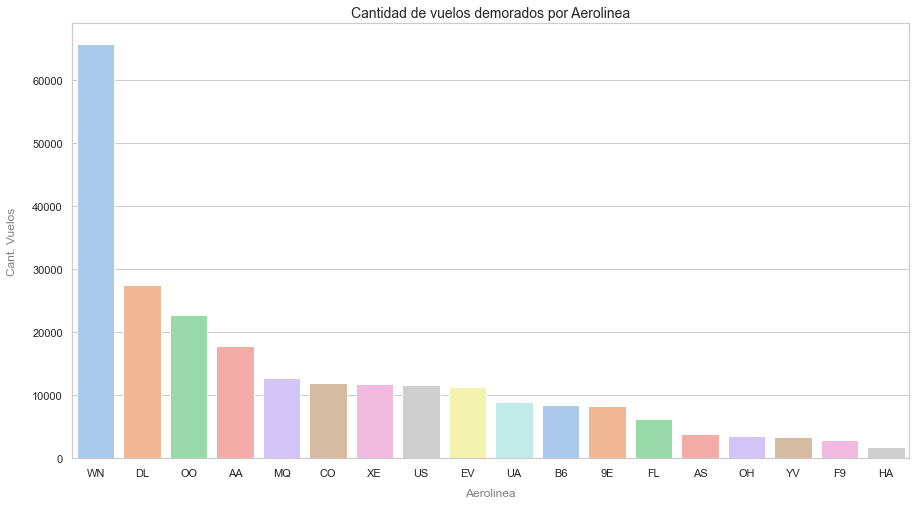

In [22]:
# Aerolinea con vuelos demorados: 
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize =(15, 8))
colores = sns.color_palette("pastel")
ax = sns.countplot(df_copia.Airline, palette = colores, order = df_copia.Airline.value_counts().index)
ax.set_title('Cantidad de vuelos demorados por Aerolinea',fontdict = {'fontsize': 14})
plt.ylabel('Cant. Vuelos', fontdict = {'fontsize': 12, 'color': 'grey'}, labelpad = 15)
plt.xlabel('Aerolinea', fontdict = {'fontsize': 12, 'color': 'grey'}, labelpad = 10)
plt.show()

<p> Claramente, podemos observar que la aerolinea con mayor cantidad de vuelos demorados es la WN. Luego, se encuentran la DL, OO, AA, etc. </p>

##### ¿En qué día de la semana suelen ocurrir más vuelos?¿Qué días acumulan mayor cantidad de vuelos demorados?

In [23]:
df_copia.DayOfWeek = df_copia.DayOfWeek.replace({1:'Lunes',2:'Martes',3:'Miércoles',4:'Jueves',5:'Viernes',6:'Sábado',7:'Domingo'})
df_copia

,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class,Time (Hours)
Flight,,,,,,,,
104,765.0,250.0,WN,SEA,MDW,Domingo,1,12:45
120,549.0,308.0,UA,SFO,IAD,Viernes,1,09:09
18,845.0,111.0,DL,DTW,LGA,Sábado,1,14:05
2339,915.0,83.0,XE,CLE,GRB,Viernes,1,15:15
521,780.0,60.0,WN,STL,MDW,Lunes,1,13:00
...,...,...,...,...,...,...,...,...
6973,530.0,72.0,OO,GEG,SEA,Viernes,1,08:50
1264,560.0,115.0,WN,LAS,DEN,Jueves,1,09:20
5209,827.0,74.0,EV,CAE,ATL,Martes,1,13:47


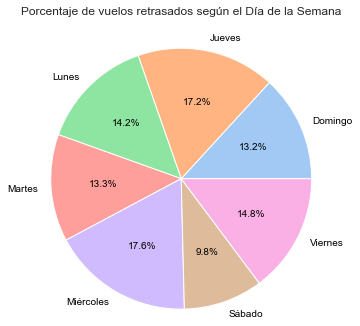

In [24]:
sns.set_theme(style="whitegrid")
colores = sns.color_palette("pastel")
etiquetas = df_copia.groupby('DayOfWeek').count().index
datos = df_copia.groupby('DayOfWeek').count()['Class']

fig1,ax1 = plt.subplots()
pat, txts, autopcts = ax1.pie(x = datos, labels = etiquetas, autopct='%1.1f%%', colors = colores, radius = 1.5)
plt.setp(autopcts, **{'color':'black', 'fontsize':10})
plt.setp(txts, **{'color':'black','fontsize':10})
ax1.set_title("Porcentaje de vuelos retrasados según el Día de la Semana", fontdict = {'fontsize': 12}, pad = 55)
plt.show()

<p> Podemos observar que los días miércoles y jueves son los que mayor cantidad de vuelos atrasados acumulan. En tercer lugar, podemos ver que son los viernes. </p>

In [25]:
df_copia_2 = df.copy()
df_copia_2.DayOfWeek = df_copia_2.DayOfWeek.replace({1:'Lunes',2:'Martes',3:'Miércoles',4:'Jueves',5:'Viernes',6:'Sábado',7:'Domingo'})

In [26]:
df_copia_2.DayOfWeek.value_counts()

Jueves       91445
Miércoles    89746
Viernes      85247
Lunes        72769
Martes       71340
Domingo      69879
Sábado       58956
Name: DayOfWeek, dtype: int64

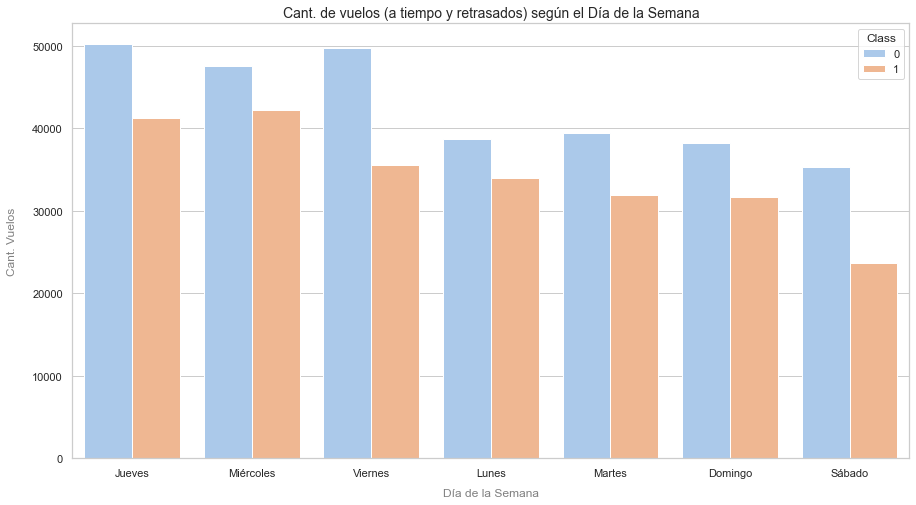

In [27]:
# Días de la semana en donde se producen la mayor cantidad de demoras en los vuelos:  
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize =(15, 8))
colores = sns.color_palette("pastel")
ax = sns.countplot(data = df_copia_2, x = 'DayOfWeek', palette = colores, hue = 'Class', order = df_copia_2.DayOfWeek.value_counts().index)
ax.set_title('Cant. de vuelos (a tiempo y retrasados) según el Día de la Semana',fontdict = {'fontsize': 14})
plt.ylabel('Cant. Vuelos', fontdict = {'fontsize': 12, 'color': 'grey'}, labelpad = 15)
plt.xlabel('Día de la Semana', fontdict = {'fontsize': 12, 'color': 'grey'}, labelpad = 10)
plt.show()

<p> Como podemos observar en el gráfico, los días en los que se producen mayor cantidad de demoras en los vuelos son los miércoles, jueves y viernes. Podemos observar, a su vez, que los fines de semana (sábados y domingo) son los días con menor cantidad de vuelos demorados. </p>

##### ¿En que horarios se suelen registrar la mayor cantidad de vuelos demorados?

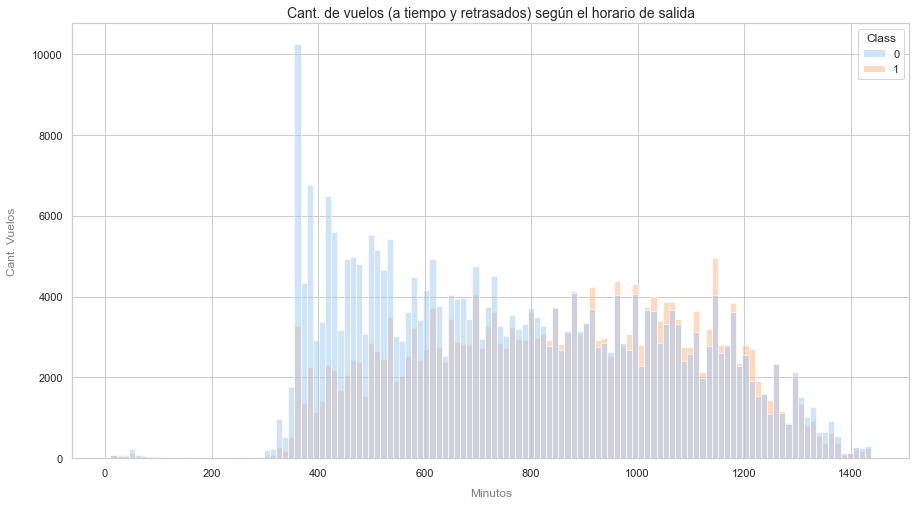

In [28]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize =(15, 8))
colores = sns.color_palette("pastel", n_colors = 2)
ax = sns.histplot(data = df, x = 'Time', hue = 'Class', palette = colores)
ax.set_title('Cant. de vuelos (a tiempo y retrasados) según el horario de salida',fontdict = {'fontsize': 14})
plt.ylabel('Cant. Vuelos', fontdict = {'fontsize': 12, 'color': 'grey'}, labelpad = 15)
plt.xlabel('Minutos', fontdict = {'fontsize': 12, 'color': 'grey'}, labelpad = 10)
plt.show()

<p> Del gráfico anterior se puede observar una tendencia de los vuelos demorados a aumentar a partir del medio día. Asimismo, se puede observar que la mayor cantidad de vuelos se produce de mañana, es decir, que no se podría decir que las demoras se producen por un aumento de la actividad. En conclusión, se debería indagar acerca de qué condiciones cambian de la mañana a la tarde, en los aeropuertos, para que incremente la cantidad de vuelos demorados. </p>

##### ¿En qué aeropuertos suelen producirse, con mayor frecuencia, demoras en los vuelos?

In [29]:
df.groupby(['AirportFrom']).count().sort_values('Class', ascending = False)

,Time,Length,Airline,AirportTo,DayOfWeek,Class,Time (Hours)
AirportFrom,,,,,,,
ATL,34449,34449,34449,34449,34449,34449,34449
ORD,24822,24822,24822,24822,24822,24822,24822
DFW,22153,22153,22153,22153,22153,22153,22153
DEN,19843,19843,19843,19843,19843,19843,19843
LAX,16657,16657,16657,16657,16657,16657,16657
...,...,...,...,...,...,...,...
MMH,16,16,16,16,16,16,16
SJT,15,15,15,15,15,15,15
GUM,10,10,10,10,10,10,10


In [30]:
df.groupby(['AirportFrom']).count().sort_values('Class', ascending = False).head(8)

,Time,Length,Airline,AirportTo,DayOfWeek,Class,Time (Hours)
AirportFrom,,,,,,,
ATL,34449,34449,34449,34449,34449,34449,34449
ORD,24822,24822,24822,24822,24822,24822,24822
DFW,22153,22153,22153,22153,22153,22153,22153
DEN,19843,19843,19843,19843,19843,19843,19843
LAX,16657,16657,16657,16657,16657,16657,16657
IAH,15821,15821,15821,15821,15821,15821,15821
PHX,15557,15557,15557,15557,15557,15557,15557
DTW,13136,13136,13136,13136,13136,13136,13136


In [31]:
df_copia_3 = df[df['AirportFrom'].isin(['ATL', 'ORD', 'DFW', 'DEN', 'LAX', 'IAH', 'PHX', 'DTW'])].copy()

In [32]:
df_copia_3.drop(columns = 'AirportTo')

,Time,Length,Airline,AirportFrom,DayOfWeek,Class,Time (Hours)
Flight,,,,,,,
2313,1296.0,141.0,DL,ATL,1,0,21:36
1300,1210.0,80.0,AA,DFW,3,0,20:10
764,530.0,108.0,FL,ATL,3,0,08:50
1015,615.0,142.0,US,IAH,4,0,10:15
7032,771.0,70.0,OO,LAX,2,0,12:51
...,...,...,...,...,...,...,...
58,695.0,138.0,CO,DEN,7,1,11:35
7255,659.0,120.0,YV,ORD,2,1,10:59
1346,680.0,75.0,WN,LAX,6,1,11:20


In [33]:
df_copia_3['AirportFrom'] = df_copia_3['AirportFrom'].astype('object')

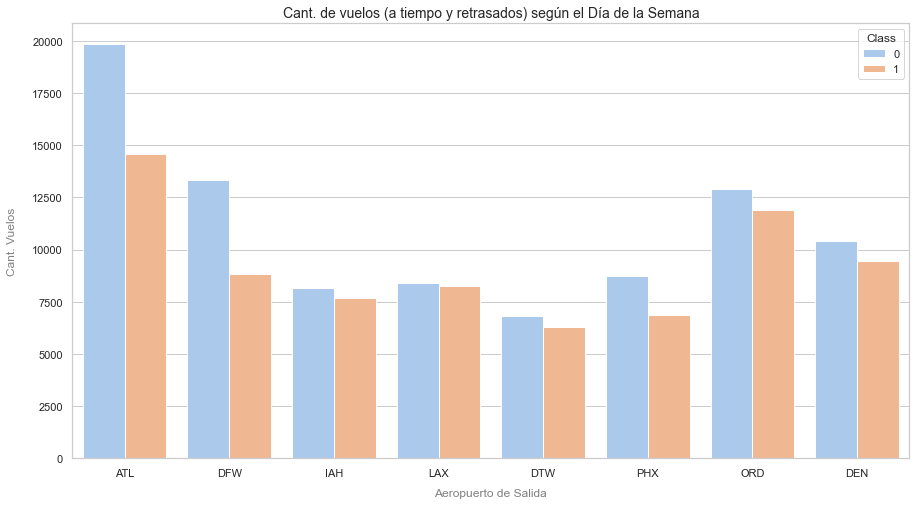

In [34]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize =(15, 8))
colores = sns.color_palette("pastel")
ax = sns.countplot(data = df_copia_3, x = 'AirportFrom', palette = colores, hue = 'Class')
ax.set_title('Cant. de vuelos (a tiempo y retrasados) según el Día de la Semana',fontdict = {'fontsize': 14})
plt.ylabel('Cant. Vuelos', fontdict = {'fontsize': 12, 'color': 'grey'}, labelpad = 15)
plt.xlabel('Aeropuerto de Salida', fontdict = {'fontsize': 12, 'color': 'grey'}, labelpad = 10)
plt.show()

<p> Podemos observar que el aeropuerto que mayor cantidad de vuelos demorados es el ATL, al cual le siguen el ORD y el DEN (estos últimos dos se caracterizan porque tiene casi igual cantidad de vuelos demorados que de vuelos a tiempo.) </p>

##### ¿Qué relación hay entre la duración del vuelo y la posibilidad de que este se demore?

In [35]:
df.Length.describe()

count    539382.000000
mean        132.202104
std          70.117045
min           0.000000
25%          81.000000
50%         115.000000
75%         162.000000
max         655.000000
Name: Length, dtype: float64

<p> Para nuestro análisis podríamos hacer tres categorías de duración de vuelo: 
    <li> Si es menor a 100 el vuelo se clasifica como 'Corto'. </li>
    <li> Si es mayor a 100 pero menor a 300 se clasifica como 'Medio'.</li>
    <li> Si es mayor a 300 se clasifica como 'Largo'. </li>
        

In [36]:
df_copy_4 = df.copy()

df_copy_4.loc[df_copy_4.Length <=100, 'Length'] = 0
df_copy_4.loc[(df_copy_4.Length > 100) & (df_copy_4.Length <= 300), 'Length'] = 1
df_copy_4.loc[df_copy_4.Length > 300, 'Length'] = 2

In [37]:
df_copy_4.Length = df_copy_4.Length.replace({0:'Corto', 1:'Medio', 2:'Largo'})

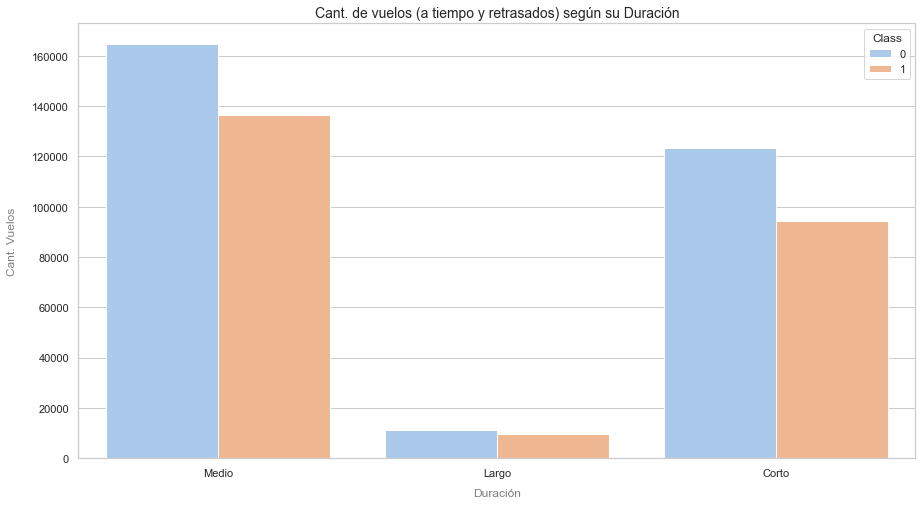

In [38]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize =(15, 8))
colores = sns.color_palette("pastel")
ax = sns.countplot(data = df_copy_4, x = 'Length', palette = colores, hue = 'Class')
ax.set_title('Cant. de vuelos (a tiempo y retrasados) según su Duración',fontdict = {'fontsize': 14})
plt.ylabel('Cant. Vuelos', fontdict = {'fontsize': 12, 'color': 'grey'}, labelpad = 15)
plt.xlabel('Duración', fontdict = {'fontsize': 12, 'color': 'grey'}, labelpad = 10)
plt.show()

<p> Podemos observar que hay más probabilidad que los vuelos se retrasen si su duración es media, o bien, si son cortos. </p>

### Modelo de predicción: 

In [39]:
# Vamos a ver cómo se distribuyen los datos: 
df['Class'].value_counts(normalize=True)

0    0.554557
1    0.445443
Name: Class, dtype: float64

<p> Podemos observar que se trata de un caso en donde las clases se encuentran medianamente balanceadas. </p>

In [40]:
# Vemos nuestro dataframe: 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539382 entries, 2313 to 6377
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   Time          539382 non-null  float64 
 1   Length        539382 non-null  float64 
 2   Airline       539382 non-null  category
 3   AirportFrom   539382 non-null  category
 4   AirportTo     539382 non-null  category
 5   DayOfWeek     539382 non-null  category
 6   Class         539382 non-null  int64   
 7   Time (Hours)  539382 non-null  object  
dtypes: category(4), float64(2), int64(1), object(1)
memory usage: 43.7+ MB


<p> Para el modelo, solo vamos a dejar las columnas de Time, Length, Airline y DayOfWeek. En el caso de Airline y DayOfWeek, al ser datos categóricos, los vamos a transformar a dummies. </p>

In [41]:
df_modelo = df.drop(columns=['Time (Hours)', 'AirportFrom', 'AirportTo']) # Eliminamos las columnas que no utilizamos

In [42]:
df_modelo = pd.get_dummies(df_modelo, columns = ['Airline', 'DayOfWeek']) # Transformamos a dummies

In [43]:
df_modelo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539382 entries, 2313 to 6377
Data columns (total 28 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Time         539382 non-null  float64
 1   Length       539382 non-null  float64
 2   Class        539382 non-null  int64  
 3   Airline_9E   539382 non-null  uint8  
 4   Airline_AA   539382 non-null  uint8  
 5   Airline_AS   539382 non-null  uint8  
 6   Airline_B6   539382 non-null  uint8  
 7   Airline_CO   539382 non-null  uint8  
 8   Airline_DL   539382 non-null  uint8  
 9   Airline_EV   539382 non-null  uint8  
 10  Airline_F9   539382 non-null  uint8  
 11  Airline_FL   539382 non-null  uint8  
 12  Airline_HA   539382 non-null  uint8  
 13  Airline_MQ   539382 non-null  uint8  
 14  Airline_OH   539382 non-null  uint8  
 15  Airline_OO   539382 non-null  uint8  
 16  Airline_UA   539382 non-null  uint8  
 17  Airline_US   539382 non-null  uint8  
 18  Airline_WN   539382 non

In [44]:
Y = df_modelo['Class'] # Definimos nuestro target

In [45]:
X = df_modelo.drop(columns = 'Class') # Eliminamos nuestro target de X

In [46]:
X.info() # Eliminamos la columna target 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539382 entries, 2313 to 6377
Data columns (total 27 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Time         539382 non-null  float64
 1   Length       539382 non-null  float64
 2   Airline_9E   539382 non-null  uint8  
 3   Airline_AA   539382 non-null  uint8  
 4   Airline_AS   539382 non-null  uint8  
 5   Airline_B6   539382 non-null  uint8  
 6   Airline_CO   539382 non-null  uint8  
 7   Airline_DL   539382 non-null  uint8  
 8   Airline_EV   539382 non-null  uint8  
 9   Airline_F9   539382 non-null  uint8  
 10  Airline_FL   539382 non-null  uint8  
 11  Airline_HA   539382 non-null  uint8  
 12  Airline_MQ   539382 non-null  uint8  
 13  Airline_OH   539382 non-null  uint8  
 14  Airline_OO   539382 non-null  uint8  
 15  Airline_UA   539382 non-null  uint8  
 16  Airline_US   539382 non-null  uint8  
 17  Airline_WN   539382 non-null  uint8  
 18  Airline_XE   539382 non

In [47]:
# Importamos las librerías que vamos a utilizar:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [48]:
# Separamos entre Train y Test: 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [49]:
# Estandarizamos los datos: 
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

##### Random Forest: 

In [58]:
# Importamos las métricas
from sklearn.metrics import roc_auc_score, roc_curve, recall_score, precision_score, precision_recall_curve, f1_score, accuracy_score, auc, balanced_accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

[[59188 30286]
 [33084 39257]]


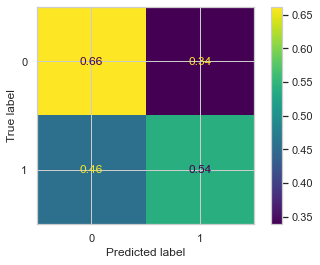

Accuracy is: 0.6083799400550011
Balanced Accuracy is 0.6020882955722258
F1 Score is: 0.5533675396803023
AUC is: 0.6392536035868551


In [63]:
# Creamos una instancia para el modelo:
rf = RandomForestClassifier(n_estimators = 100)
# Entrenamos el modelo con los datos de entrenamiento:
rf.fit(X_train, y_train)
# Hacemos la predicción: 
y_test_pred = rf.predict(X_test)

# Graficamos la matriz de confusión:
cm = confusion_matrix(y_test, y_test_pred, normalize = 'true')
print(confusion_matrix(y_test, y_test_pred))
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

# Calculamos el Accuracy (para ver cuán diferente es el valor que nos devuelve, respecto de las demás métricas)
print(f"Accuracy is: {accuracy_score(y_test, y_test_pred)}")

# Calculamos el Balanced Accuracy: 
from sklearn.metrics import balanced_accuracy_score
print('Balanced Accuracy is', balanced_accuracy_score(y_test, y_test_pred))

# Calculamos el F1 Score:
from sklearn.metrics import f1_score
print(f"F1 Score is: {f1_score(y_test, y_test_pred)}")

# Calculamos y graficamos la curva AUC - ROC:
from sklearn.metrics import roc_curve, auc
class_probabilities = rf.predict_proba(X_test)
preds = class_probabilities[:, 1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC is: {roc_auc}")

<p> Como podemos observar, el accuracy es bastante bajo. Vamos a intentar mejorarlo reduciendo el número de estimadores. </p>

[[59135 30339]
 [33619 38722]]


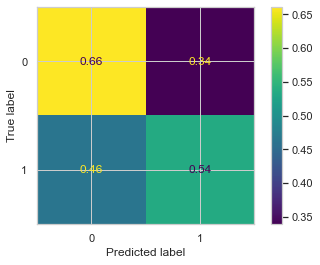

Accuracy is: 0.6047461607391157
Balanced Accuracy is 0.598094355393918
F1 Score is: 0.5476867371041428
AUC is: 0.6322896737973523


In [68]:
# Creamos una instancia para el modelo:
rf = RandomForestClassifier(n_estimators = 10)
# Entrenamos el modelo con los datos de entrenamiento:
rf.fit(X_train, y_train)
# Hacemos la predicción: 
y_test_pred = rf.predict(X_test)

# Graficamos la matriz de confusión:
cm = confusion_matrix(y_test, y_test_pred, normalize = 'true')
print(confusion_matrix(y_test, y_test_pred))
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

# Calculamos el Accuracy (para ver cuán diferente es el valor que nos devuelve, respecto de las demás métricas)
print(f"Accuracy is: {accuracy_score(y_test, y_test_pred)}")

# Calculamos el Balanced Accuracy: 
from sklearn.metrics import balanced_accuracy_score
print('Balanced Accuracy is', balanced_accuracy_score(y_test, y_test_pred))

# Calculamos el F1 Score:
from sklearn.metrics import f1_score
print(f"F1 Score is: {f1_score(y_test, y_test_pred)}")

# Calculamos y graficamos la curva AUC - ROC:
from sklearn.metrics import roc_curve, auc
class_probabilities = rf.predict_proba(X_test)
preds = class_probabilities[:, 1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC is: {roc_auc}")

<p> Podemos observar que, aun disminuyendo el numero de estimadores, no mejora la predicción. </p>

##### Regresión Logística: 

[[69964 19510]
 [40199 32142]]


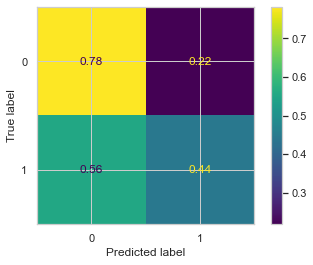

Accuracy is: 0.6310045422241448
Balanced Accuracy is 0.6131300912047796
F1 Score  is: 0.5184486220996346
AUC is: 0.6735183446053016


In [69]:
# Creamos una instancia para el modelo:
lr = LogisticRegression(random_state = 0)
# Entrenamos el modelo con los datos de entrenamiento:
lr.fit(X_train, y_train)
# Hacemos la predicción: 
y_test_pred = lr.predict(X_test)

# Graficamos la matriz de confusión: 
cm = confusion_matrix(y_test, y_test_pred, normalize = 'true')
print(confusion_matrix(y_test, y_test_pred))
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

# Calculamos el Accuracy (para ver cuán diferente es el valor que nos devuelve, respecto de las demás métricas)
print(f"Accuracy is: {accuracy_score(y_test, y_test_pred)}")

# Calculamos el Balanced Accuracy: 
from sklearn.metrics import balanced_accuracy_score
print('Balanced Accuracy is', balanced_accuracy_score(y_test, y_test_pred))

# Calculamos el F1 Score:
from sklearn.metrics import f1_score
print(f"F1 Score  is: {f1_score(y_test, y_test_pred)}")

# Calculamos y graficamos la curva AUC - ROC:
from sklearn.metrics import roc_curve, auc
class_probabilities = lr.predict_proba(X_test)
preds = class_probabilities[:, 1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC is: {roc_auc}")

##### Gaussian NB

[[48555 40919]
 [24341 48000]]


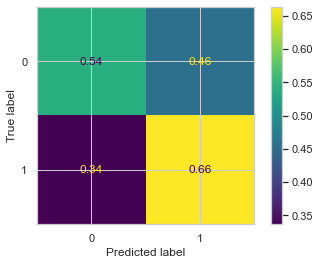

Accuracy is: 0.5966999351110837
Balanced Accuracy is 0.6030978783512912
F1 Score is: 0.5953119186407044
AUC is: 0.6509535086460073


In [65]:
# Creamos una instancia para el modelo:
gnb = GaussianNB()
# Entrenamos el modelo con los datos de entrenamiento:
gnb.fit(X_train, y_train)
# Hacemos la predicción: 
y_test_pred = gnb.predict(X_test)

# Graficamos la matriz de confusión: 
cm = confusion_matrix(y_test, y_test_pred, normalize = 'true')
print(confusion_matrix(y_test, y_test_pred))
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

# Calculamos el Accuracy (para ver cuán diferente es el valor que nos devuelve, respecto de las demás métricas)
print(f"Accuracy is: {accuracy_score(y_test, y_test_pred)}")

# Calculamos el Balanced Accuracy: 
from sklearn.metrics import balanced_accuracy_score
print('Balanced Accuracy is', balanced_accuracy_score(y_test, y_test_pred))

# Calculamos el F1 Score:
from sklearn.metrics import f1_score
print(f"F1 Score is: {f1_score(y_test, y_test_pred)}")

# Calculamos y graficamos la curva AUC - ROC:
from sklearn.metrics import roc_curve, auc
class_probabilities = gnb.predict_proba(X_test)
preds = class_probabilities[:, 1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC is: {roc_auc}")

##### Resumen: 

<p> Se puede observar que, a pesar de probar diferentes modelos, el accuracy de las predicciones oscila entre 0,59 - 0,61. Por lo tanto, lo que podríamos hacer es: 
    <li> Eliminar diferentes variables para ver el comportamiento de los modelos y las predicciones obtenidas. </li>
    <li> Probar con otros modelos distintos a los utilizados. </li>
    <li> Realizar el hyperturning de parámetros. </li>
    <li> Probar con modelos de Ensamble y Boosting. </li> 